In [6]:
import wfdb
import numpy as np
import scipy.io as scio
from scipy.signal import medfilt
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Serif CJK JP'
matplotlib.rcParams.update({'font.size': 18})
import ft

In [7]:
# 读取一个record
rec_name = f'../ecg_data/Person_32/rec_1'
rd = wfdb.rdrecord(rec_name, channels = [0])

In [8]:
# 读取心电数据
ecg_data = rd.p_signal.flatten()[0:3000]

In [9]:
md_data = ft.median_denoising(ecg_data, rd.fs)
wave_data = ft.wavelet_denoising(ecg_data)
md_wave_data = ft.wavelet_denoising(md_data)

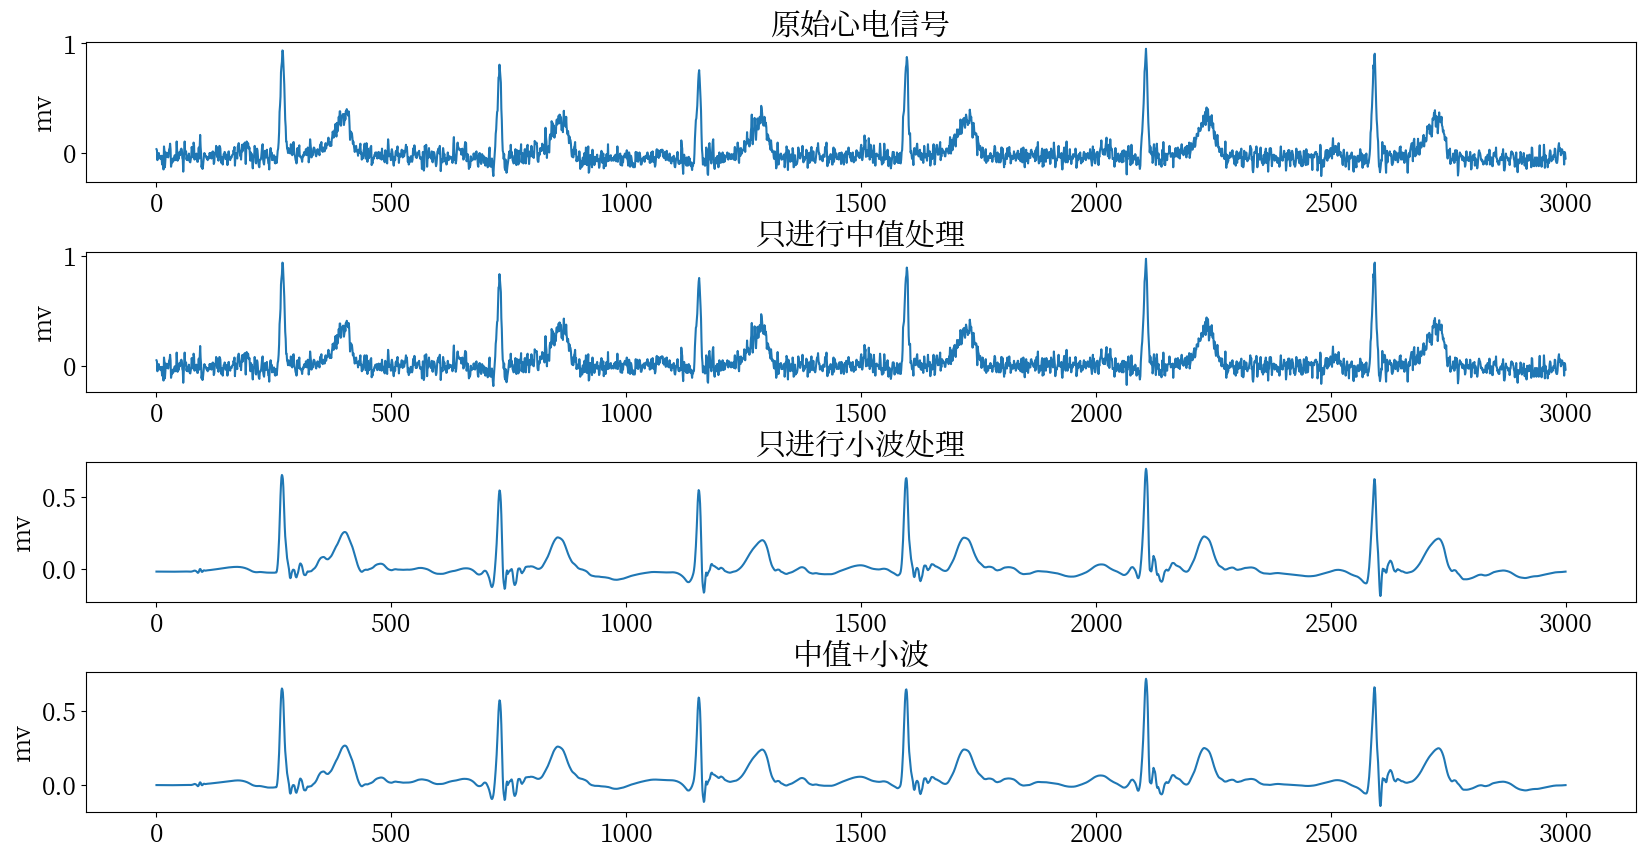

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 1)
plt.ylabel("mv")
plt.title("原始心电信号")
plt.plot(ecg_data)

plt.subplot(4, 1, 2)
plt.ylabel("mv")
plt.title("只进行中值处理")
plt.plot(md_data)

plt.subplot(4, 1, 3)
plt.ylabel("mv")
plt.title("只进行小波处理")
plt.plot(wave_data)

plt.subplot(4, 1, 4)
plt.ylabel("mv")
plt.title("中值+小波")
plt.plot(md_wave_data)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.savefig('消噪实验结果对比图.png')
plt.show()